In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [61]:
prefixes = ['BRC6LONG', 'TP6LONG', 'TC6LONG']
titles = {'BRC6LONG': 'Spinner', 'TP6LONG': 'Walker', 'TC6LONG': 'Isotropic'}
locdir = '/Users/leewalsh/Physics/Squares/motility/'#+prefix[:-4]+'/'
savedir = lambda prefix: '/Users/leewalsh/Physics/Squares/writing/graphics/'+prefix+'-'

In [53]:
fps = 120
S = 22

In [17]:
for prefix in prefixes:
    try:
        datanpz[prefix] = np.load(locdir+prefix+'_TRACKS.npz')
        data[prefix] = datanpz[prefix]['data']
        trackids[prefix] = datanpz[prefix]['trackids']

        cdatanpz[prefix] = np.load(locdir+prefix+'_CORNER_POSITIONS.npz')
        cdata[prefix] = cdatanpz[prefix]['data']

        odatanpz[prefix] = np.load(locdir+prefix+'_ORIENTATION.npz')
        odata[prefix] = odatanpz[prefix]['odata']
        omask[prefix] = odatanpz[prefix]['omask']
        print prefix, "loaded successfully"

    except NameError:
        print 'made empty dictionaries, run again'
        datanpz = {}
        data = {}
        trackids={}

        cdatanpz= {}
        cdata={}

        odatanpz={}
        odata={}
        omask={}

BRC6LONG loaded successfully


In [18]:
import orientation as orient
reload(orient)

<module 'orientation' from 'orientation.pyc'>

saving to /Users/leewalsh/Physics/Squares/writing/graphics/BRC6LONG-quiver_tracks.png


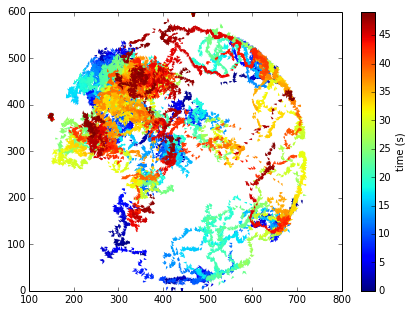

saving to /Users/leewalsh/Physics/Squares/writing/graphics/TP6LONG-quiver_tracks.png


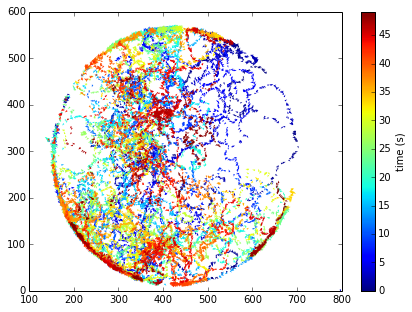

saving to /Users/leewalsh/Physics/Squares/writing/graphics/TC6LONG-quiver_tracks.png


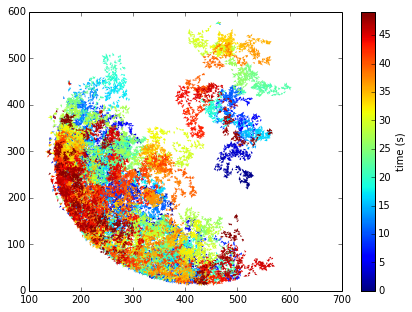

In [62]:
for prefix in prefixes:
    orient.plot_orient_quiver(data[prefix], odata[prefix], omask[prefix], imfile=None,#locdir+prefix+'_0001.tif',
                              fps=fps,
                          figsize=(7,5), savename = savedir(prefix) + 'quiver_tracks.png')

tracks used are set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 18, 22, 24, 25, 29, 33, 41, 43, 45, 46, 47, 48, 50, 52, 56, 58, 59, 63, 65, 67, 68, 69, 70, 72, 73, 75, 77, 78, 80, 85, 88, 90, 93, 95, 96, 97, 98, 99, 103, 104, 105, 110, 113, 114, 115, 116, 119, 121, 123, 124, 126])


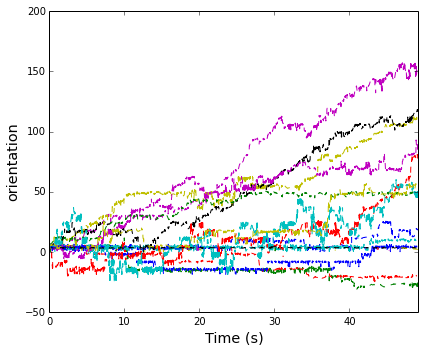

tracks used are set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 22, 23, 24, 25, 26, 29, 30, 35, 36, 42, 43, 44, 45, 53, 55, 56, 57, 58, 59, 61, 62, 64, 65, 66, 67])


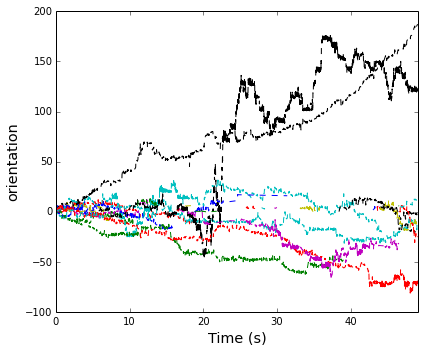

tracks used are set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21, 22, 23, 26, 29, 31, 35, 36, 37, 38, 39, 40, 41, 42, 46, 47])


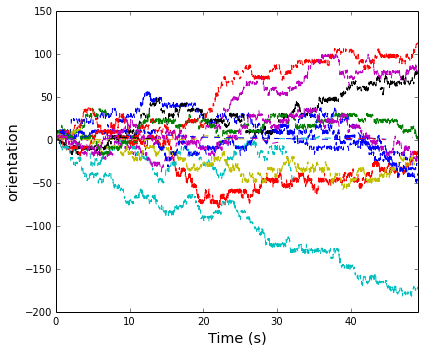

In [63]:
for prefix in prefixes:
    orient.plot_orient_time(data[prefix], odata[prefix], trackids[prefix], fps=fps,
                            delta=False, save=savedir(prefix)+'orient_tracking.pdf')

In [140]:
for prefix in ['BRC6LONG']:#prefixes:
    try:
        msdnpz[prefix] = np.load(locdir+prefix+'_MSD.npz')
        dtau[prefix] = msdnpz[prefix]['dtau'][()]
        dt0[prefix] = msdnpz[prefix]['dt0'][()]
        msds[prefix] = msdnpz[prefix]['msds']
        msdids[prefix] = msdnpz[prefix]['msdids'] if 'msdids' in msdnpz[prefix].files else None
        msadnpz[prefix] = np.load(locdir+prefix+'_MSAD.npz')
        dtau_o[prefix] = msadnpz[prefix]['dtau'][()]#, "dtaus do not match: {} and {}".format(dtau[prefix], msadnpz[prefix]['dtau'][()])
        dt0_o[prefix] = msadnpz[prefix]['dt0'][()]#, "dt0s do not match: {} and {}".format(dt0[prefix], msadnpz[prefix]['dt0'][()])
        msads[prefix] = msadnpz[prefix]['msds']
        msadids[prefix] = msadnpz[prefix]['msdids'] if 'msadids' in msdnpz[prefix].files else None
        print prefix, 'loaded'
    except NameError:
        print 'building empty dicts, run again'
        msdnpz = {}
        dtau = {}
        dt0 = {}
        dtau_o = {}
        dt0_o = {}
        msds = {}
        msdids = {}
        msadnpz = {}
        msads = {}
        msadids = {}

BRC6LONG loaded


In [104]:
import tracks
reload(tracks)
import otracks
reload(otracks)

<module 'otracks' from 'otracks.py'>

In [152]:
badtracks = {'TP6LONG': [2, 11, 12, 16], 'TC6LONG': [], 'BRC6LONG':[]}

In [159]:
prefix = 'BRC6LONG'

using dtau = 10, dt0 = 10
using S = 22 pixels, thus A = 484 px^2
Rough coefficient of diffusion: 2.67811969847
Rough diffusion timescale: 0.416666666667


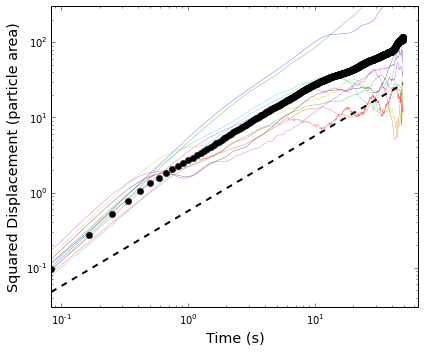

using dtau = 1, dt0 = 1
using S = 22 pixels, thus A = 484 px^2
Rough coefficient of diffusion: 16.8889989502
Rough diffusion timescale: 0.15


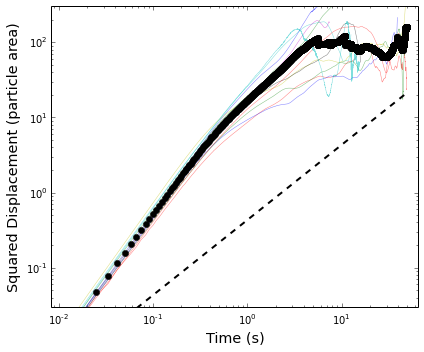

using dtau = 10, dt0 = 10
using S = 22 pixels, thus A = 484 px^2
Rough coefficient of diffusion: 3.93876799199
Rough diffusion timescale: 0.25


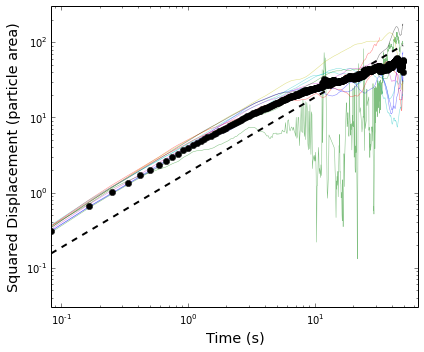

In [162]:
for prefix in prefixes:
    tracks.plot_msd(msds[prefix], msdids[prefix], dtau[prefix], dt0[prefix],
                data[prefix]['f'].max()+1, S=S, fps=fps, prefix=prefix,
                singletracks = set(xrange(100)).difference(badtracks[prefix]),
                figsize=(6,5), show_tracks=True, meancol='k',
                xlim=(dtau[prefix]/fps,64), title='', ylim=(3e-2, 3e2))
                #save=savedir(prefix)+'MSD.pdf')

using dtau = 1, dt0 = 10
zero msd for tau = [], using np.nan
Rough coefficient of diffusion: 23.263666595
Rough diffusion timescale: 0.0166666666667
saving to /Users/leewalsh/Physics/Squares/writing/graphics/BRC6LONG-MSAD.pdf


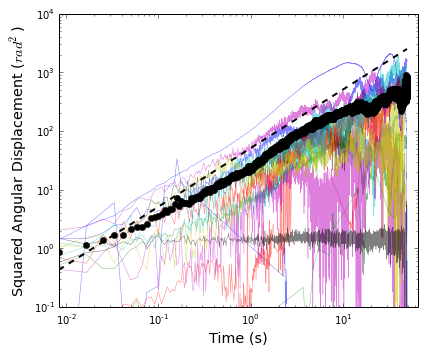

using dtau = 10, dt0 = 10
zero msd for tau = [], using np.nan
Rough coefficient of diffusion: 42.8030829959
Rough diffusion timescale: 0.0833333333333
saving to /Users/leewalsh/Physics/Squares/writing/graphics/TP6LONG-MSAD.pdf


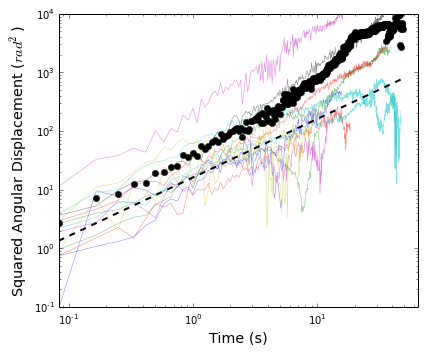

using dtau = 1, dt0 = 10
zero msd for tau = [], using np.nan
Rough coefficient of diffusion: 70.0651087139
Rough diffusion timescale: 0.00833333333333
saving to /Users/leewalsh/Physics/Squares/writing/graphics/TC6LONG-MSAD.pdf


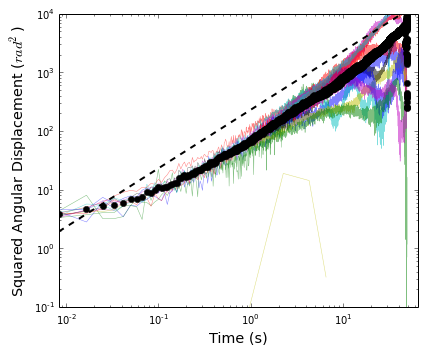

In [78]:
for prefix in prefixes:
    otracks.plot_msd(msads[prefix], msadids[prefix], dtau_o[prefix], dt0_o[prefix],
                     data[prefix][omask[prefix]]['f'].max()+1, prefix=prefix, fps=fps,
                     S=S, show_tracks=True, figsize=(6,5), meancol='k', title="",
                     xlim=(dtau_o[prefix]/fps, 64), ylim=(1e-1,1e4),
                     save=savedir(prefix) + 'MSAD.pdf')